In [1]:
###---------<pruebas_seaborn.ipynb>---------###
!pip install seaborn
'''
Seaborn harnesses the power of matplotlib to create beautiful charts in a few lines of code.
The key difference is Seaborn's default styles and color palettes, which are designed to be more aesthetically pleasing and modern. 
Since Seaborn is built on top of matplotlib, you'll need to know matplotlib to tweak Seaborn's defaults. 
'''

DEPRECATION: Python 3.4 support has been deprecated. pip 19.1 will be the last one supporting it. Please upgrade your Python as Python 3.4 won't be maintained after March 2019 (cf PEP 429).
    100% |████████████████████████████████| 215kB 19.7MB/s 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
sns.set(color_codes=True)

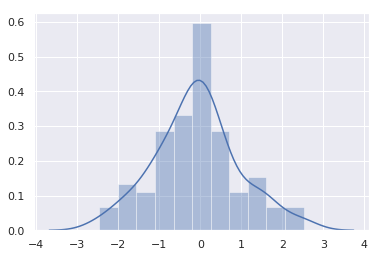

In [5]:
x = np.random.normal(size=100)
sns.distplot(x);

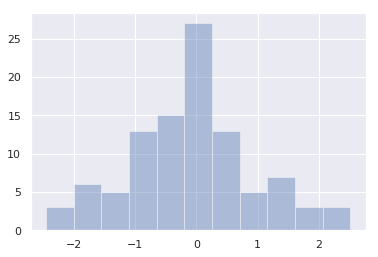

In [10]:
sns.distplot(x, kde=False, rug=False);

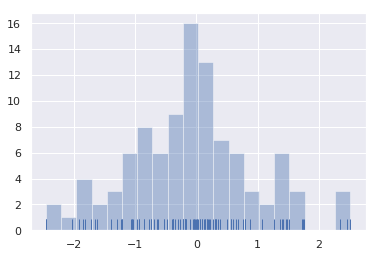

In [11]:
sns.distplot(x, bins=20, kde=False, rug=True);


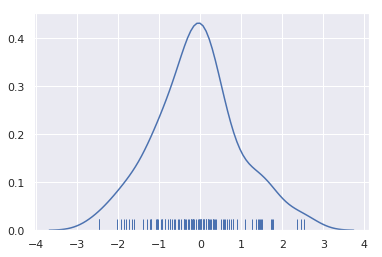

In [12]:
sns.distplot(x, hist=False, rug=True);

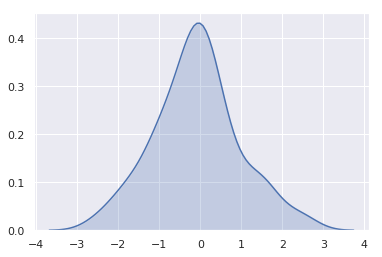

In [13]:
sns.kdeplot(x, shade=True);

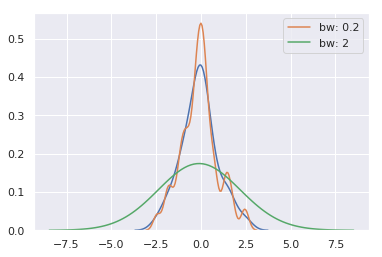

In [14]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

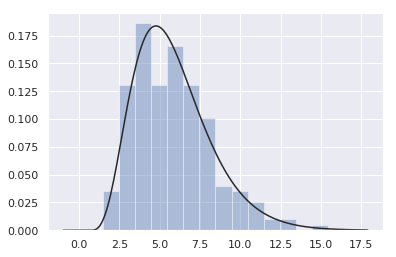

In [15]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

In [16]:
#Plotting bivariate distributions
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])



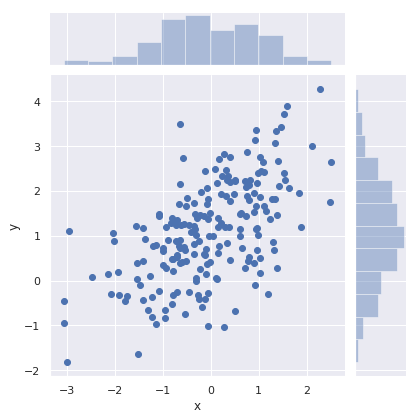

In [17]:
#Scatterplots
sns.jointplot(x="x", y="y", data=df);

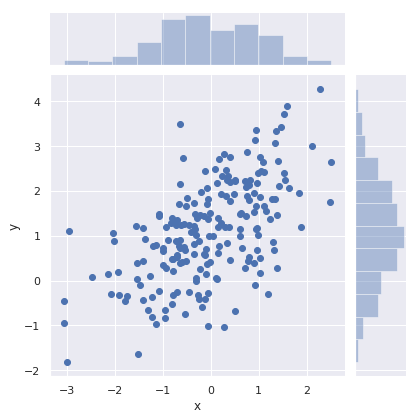

In [18]:
sns.jointplot(x="x", y="y", data=df);

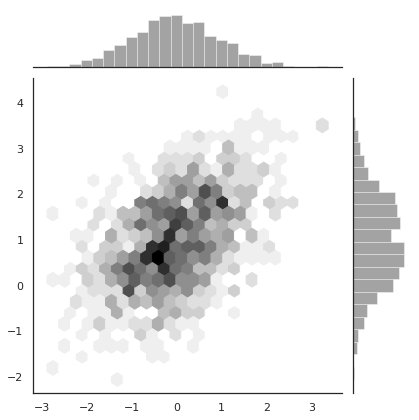

In [19]:
#Hexbin plots
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

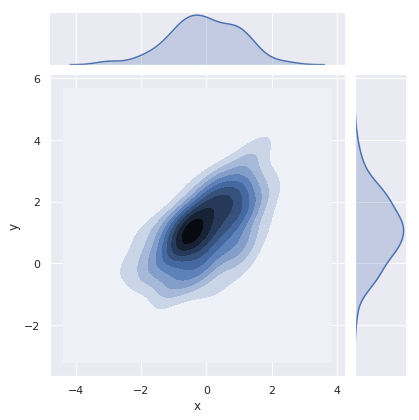

In [20]:
#Kernel density estimation
sns.jointplot(x="x", y="y", data=df, kind="kde");

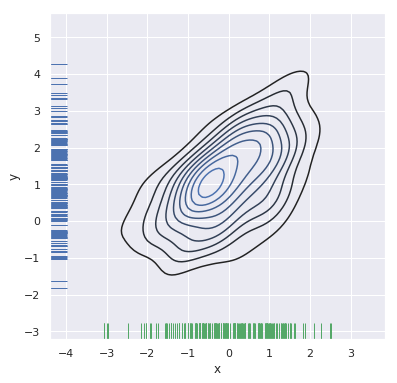

In [21]:
#Contours
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

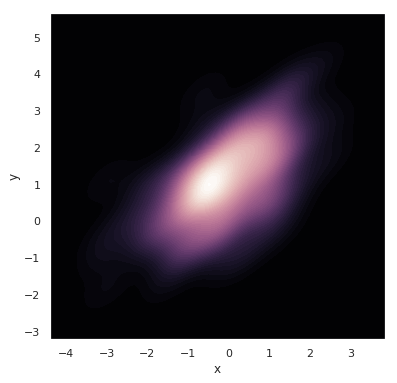

In [22]:
#increase Number of Contours levels
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

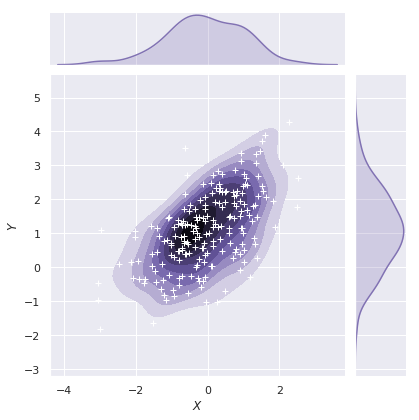

In [23]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

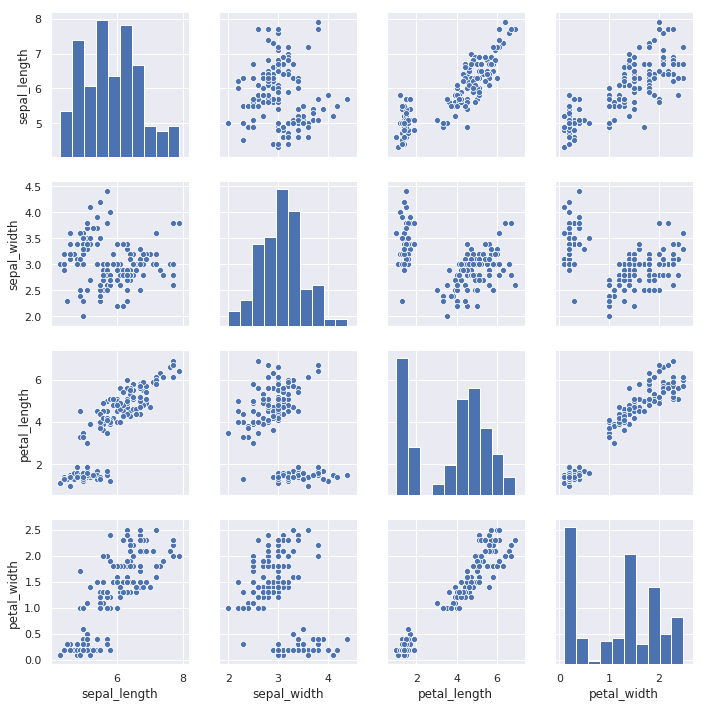

In [24]:
###---<Visualizing pairwise relationships in a dataset>---###
iris = sns.load_dataset("iris")
sns.pairplot(iris);

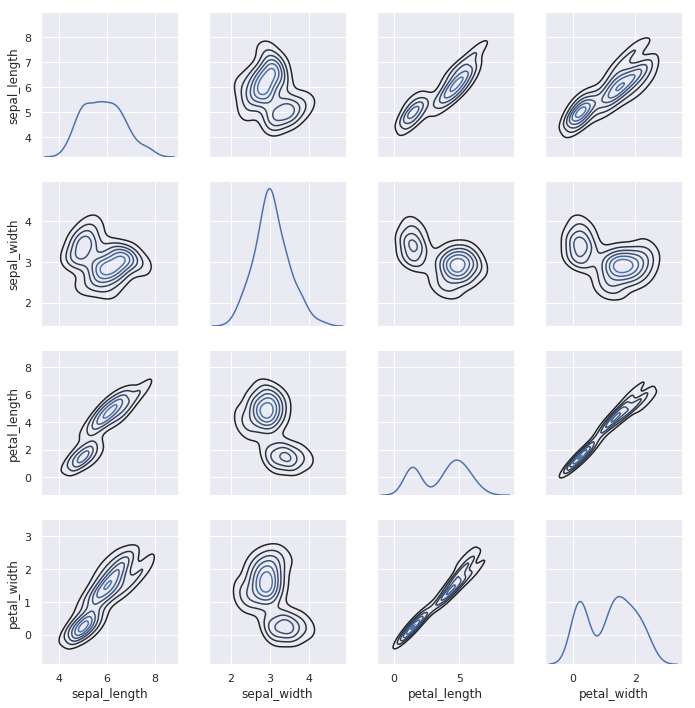

In [25]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);